In [25]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import load_linnerud
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale

In [31]:
X0, Y0 = load_linnerud(return_X_y=True)
XY0 = np.hstack((X0,Y0))
print(XY0)

[[  5. 162.  60. 191.  36.  50.]
 [  2. 110.  60. 189.  37.  52.]
 [ 12. 101. 101. 193.  38.  58.]
 [ 12. 105.  37. 162.  35.  62.]
 [ 13. 155.  58. 189.  35.  46.]
 [  4. 101.  42. 182.  36.  56.]
 [  8. 101.  38. 211.  38.  56.]
 [  6. 125.  40. 167.  34.  60.]
 [ 15. 200.  40. 176.  31.  74.]
 [ 17. 251. 250. 154.  33.  56.]
 [ 17. 120.  38. 169.  34.  50.]
 [ 13. 210. 115. 166.  33.  52.]
 [ 14. 215. 105. 154.  34.  64.]
 [  1.  50.  50. 247.  46.  50.]
 [  6.  70.  31. 193.  36.  46.]
 [ 12. 210. 120. 202.  37.  62.]
 [  4.  60.  25. 176.  37.  54.]
 [ 11. 230.  80. 157.  32.  52.]
 [ 15. 225.  73. 156.  33.  54.]
 [  2. 110.  43. 138.  33.  68.]]


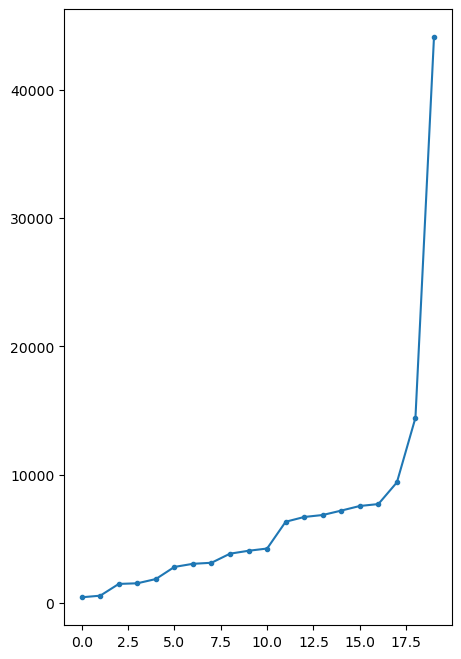

[  9.45 145.55  70.3  178.6   35.4   56.1 ]


In [32]:
c0 = pca.find_center(XY0)
plt.plot(sorted(pca.distance_center(XY0, c0)), marker='o', markersize=3)
fig = plt.gcf()
fig.set_size_inches(5, 8)
plt.show()
print(c0)

0.9
[  9.45 145.55  70.3  178.6   35.4   56.1 ]


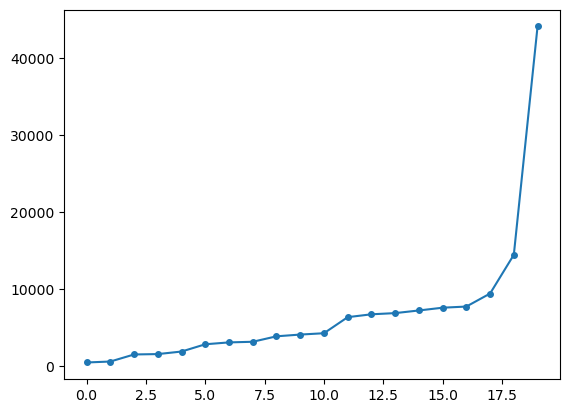

In [33]:
N = len(X0)
alpha = (N - 2) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(XY0, wma)
print(c)
plt.plot(sorted(pca.distance_center(XY0, c)), marker='o', markersize=4)
plt.show()

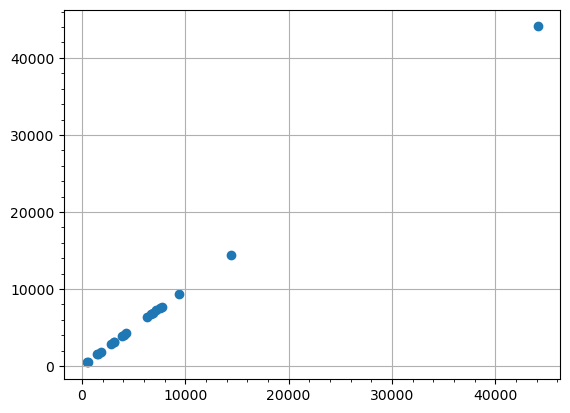

In [35]:
D0 = pca.distance_center(XY0, c0)
D1 = pca.distance_center(XY0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [37]:
XY1_0 = XY0 - c0
XY1 = XY0 - c

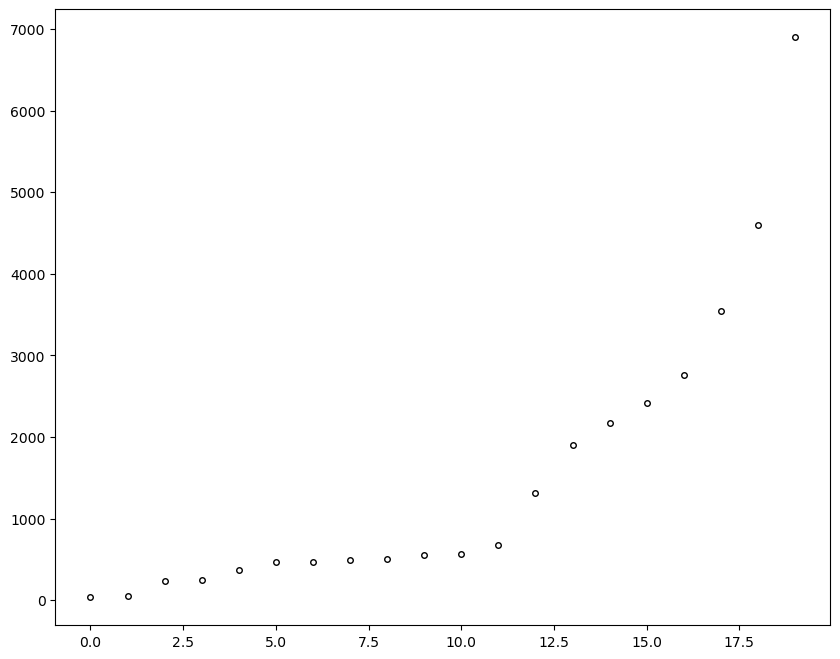

5370.19486465228 [ 0.04793565  0.79612138  0.58241061 -0.15436281 -0.02348075  0.01765151]


In [38]:
a1_0, L1_0 = pca.find_pc(XY1_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(XY1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L1_0, a1_0)

0.6
4129.090571599759 [ 0.0334674   0.9139968   0.38357776 -0.1261071  -0.02100631  0.00369016]


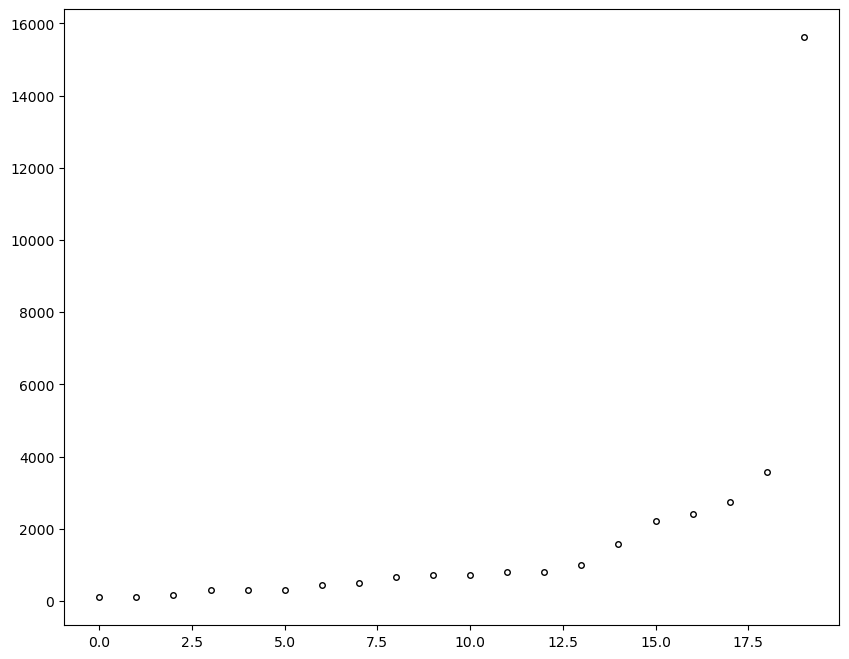

In [44]:
N = len(XY0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a1, L1 = pca.find_rob_pc(XY1, wma)
print(L1, a1)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
U1 = pca.project_line(XY0, a1)
U1_0 = pca.project_line(XY0, a1_0)

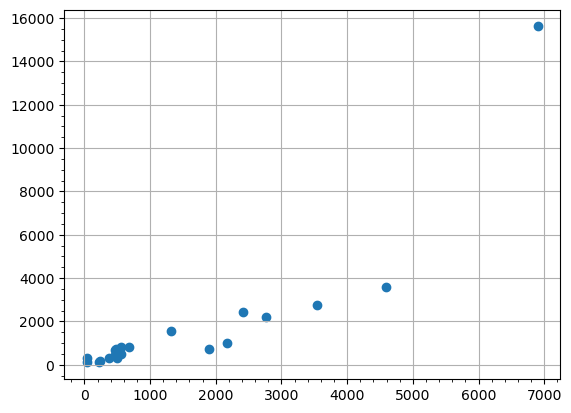

In [45]:
plt.scatter(pca.distance_line(XY1_0, a1_0), pca.distance_line(XY1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [46]:
XY2_0 = pca.project(XY1_0, a1_0)
XY2 = pca.project(XY1, a1)

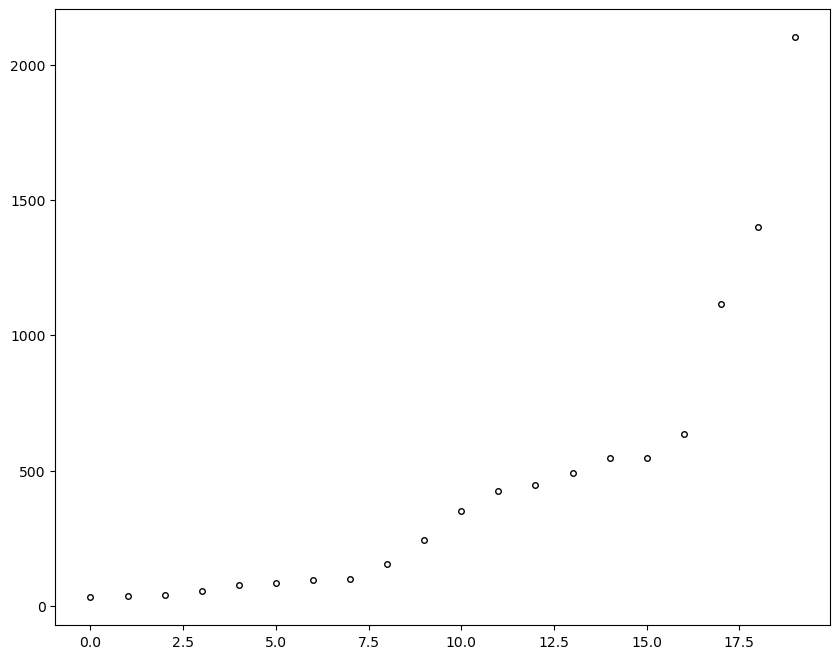

1062.565691523406 [-0.02632093 -0.50789501  0.78914424  0.33411154  0.05828814 -0.05977641]


In [47]:
a2_0, L2_0 = pca.find_pc(XY2_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(XY2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2_0, a2_0)

0.85


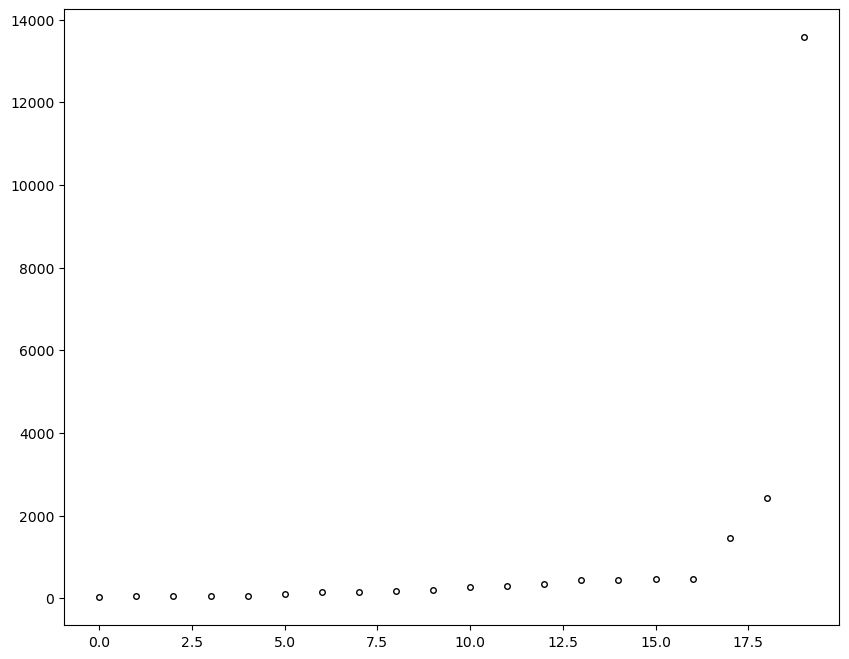

567.1490204143146 [-0.02498939 -0.04002865  0.40156978  0.90764981  0.09057762 -0.06695122]


In [48]:
N = len(X0)
alpha = (N - 3) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a2, L2 = pca.find_rob_pc(XY2, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(XY2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U2 = pca.project_line(XY0, a2)
U2_0 = pca.project_line(XY0, a2_0)

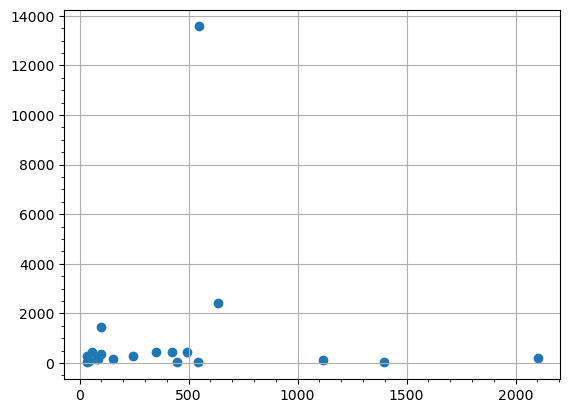

In [49]:
plt.scatter(pca.distance_line(XY2_0, a2_0), pca.distance_line(XY2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [20]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

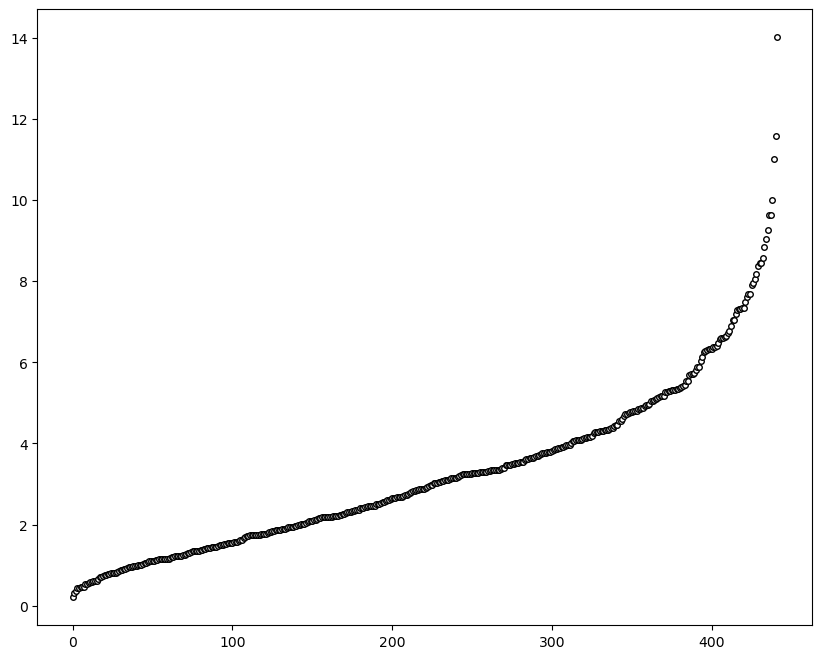

1.2059662591250038 [ 0.49466789 -0.10686416  0.16752689  0.51357085 -0.06857914 -0.269689
  0.38603187 -0.38067992  0.06363009  0.2768422 ]


In [21]:
a3_0, L3_0 = pca.find_pc(X3_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L3_0, a3_0)

0.9773755656108597


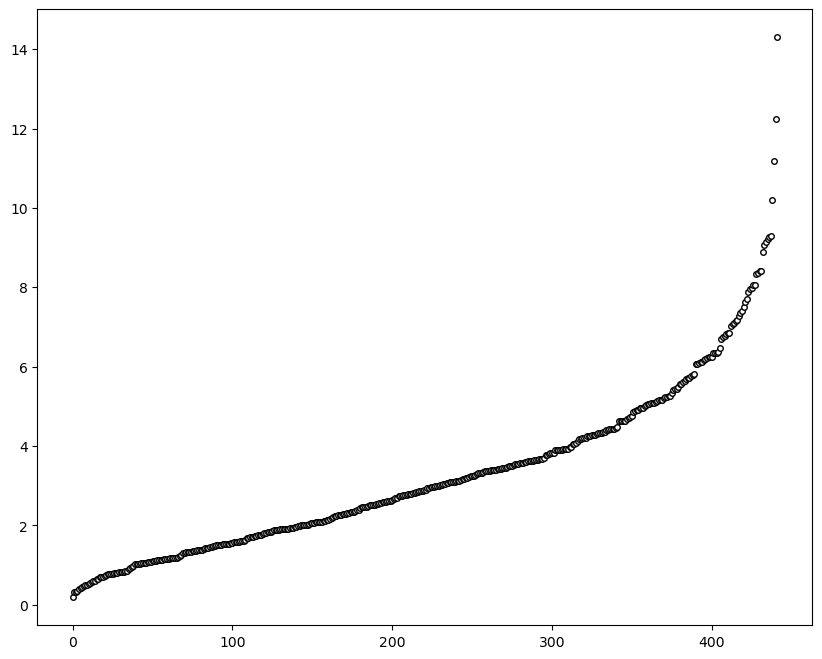

1.433430856999353 [ 0.17212003 -0.43454355 -0.09834059 -0.05168973  0.53524046  0.38997348
  0.55430381 -0.14501764 -0.0182665  -0.04500816]


In [22]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U3 = pca.project_line(X0, a3)
U3_0 = pca.project_line(X0, a3_0)

In [18]:
X4_0 = pca.project(X3_0, a3_0)
X4 = pca.project(X3, a3)

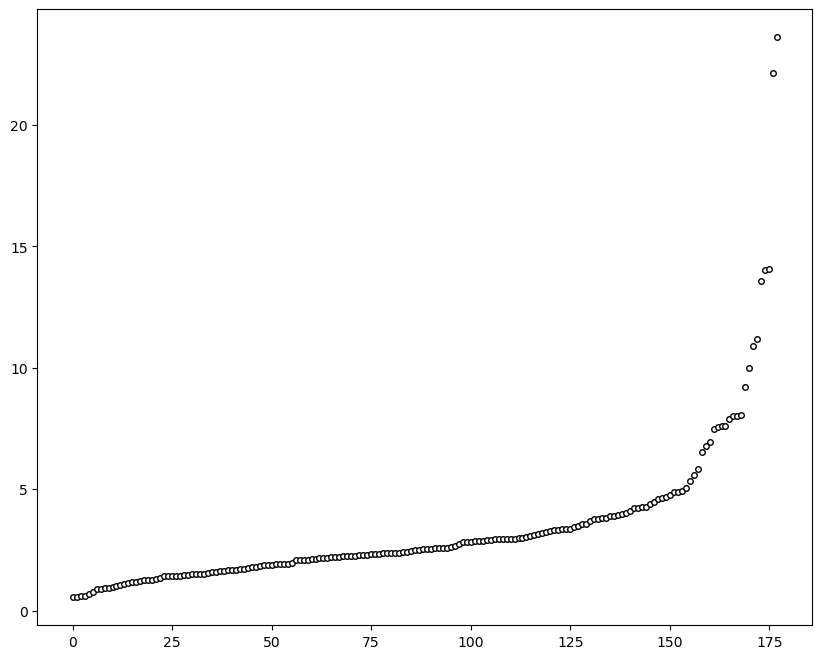

0.9189739237528227 [-0.01785624  0.53689027 -0.21417556  0.06085938 -0.35179672  0.19806837
  0.15229481 -0.20330093  0.3990565   0.0659257  -0.42777138  0.18412076
 -0.23207083]


In [19]:
a4_0, L4_0 = pca.find_pc(X4_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4_0, a4_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4_0, a4_0)

0.8876404494382022


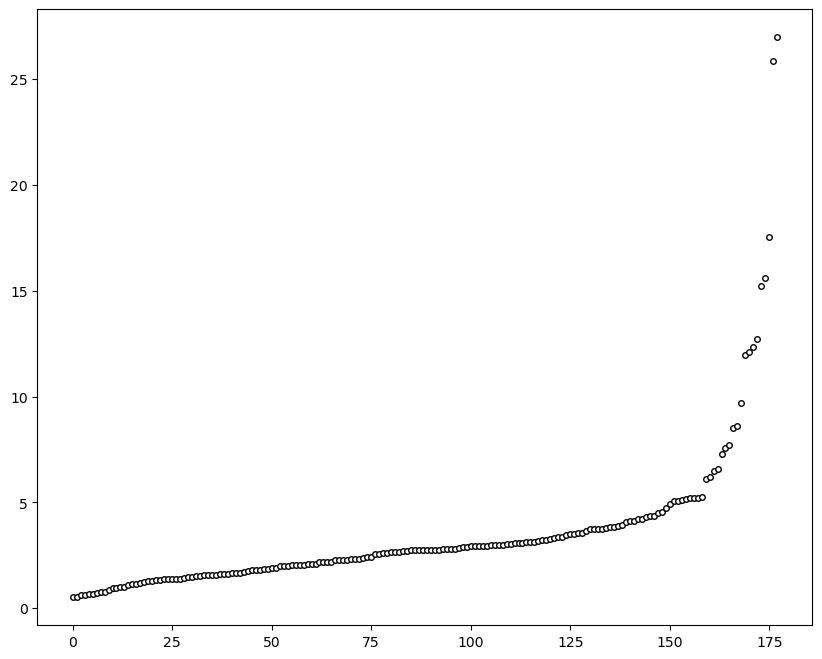

0.7666191076036115 [ 0.19928371 -0.35358493 -0.0219883  -0.29241943  0.07347939 -0.16530731
 -0.12165777  0.48746594 -0.34769435 -0.06521992  0.50119942 -0.19677789
  0.22148209]


In [20]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a4, L4 = pca.find_rob_pc(X4, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4, a4)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4, a4)
U4 = pca.project_line(X0, a4)
U4_0 = pca.project_line(X0, a4_0)

In [21]:
X5_0 = pca.project(X4_0, a4_0)
X5 = pca.project(X4, a4)

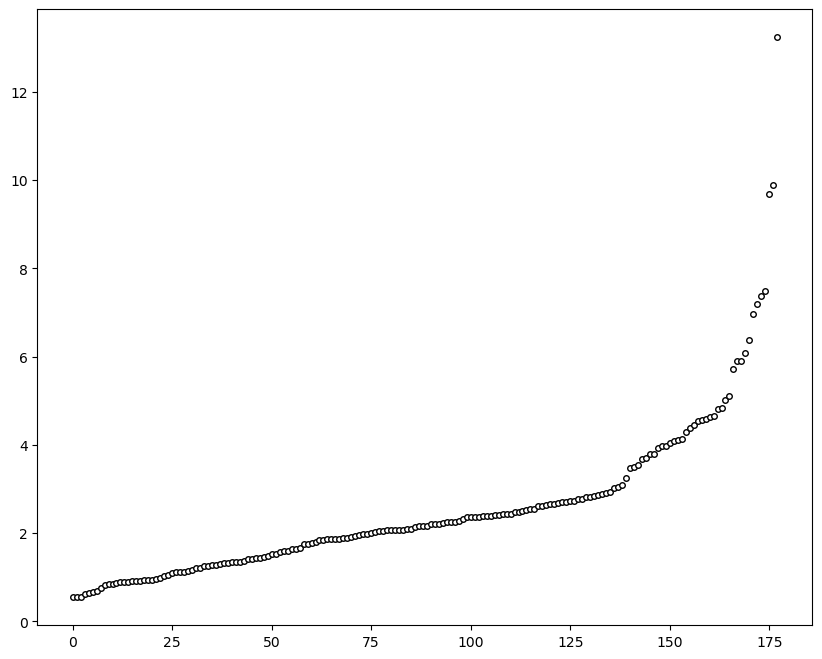

0.8532281783543193 [ 0.26566364 -0.03521376  0.1430255  -0.06610295 -0.72704845  0.14931838
  0.10902581  0.50070304 -0.13685986  0.07643679  0.1736146   0.10116094
  0.15786884]


In [22]:
a5_0, L5_0 = pca.find_pc(X5_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5_0, a5_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5_0, a5_0)

0.8876404494382022


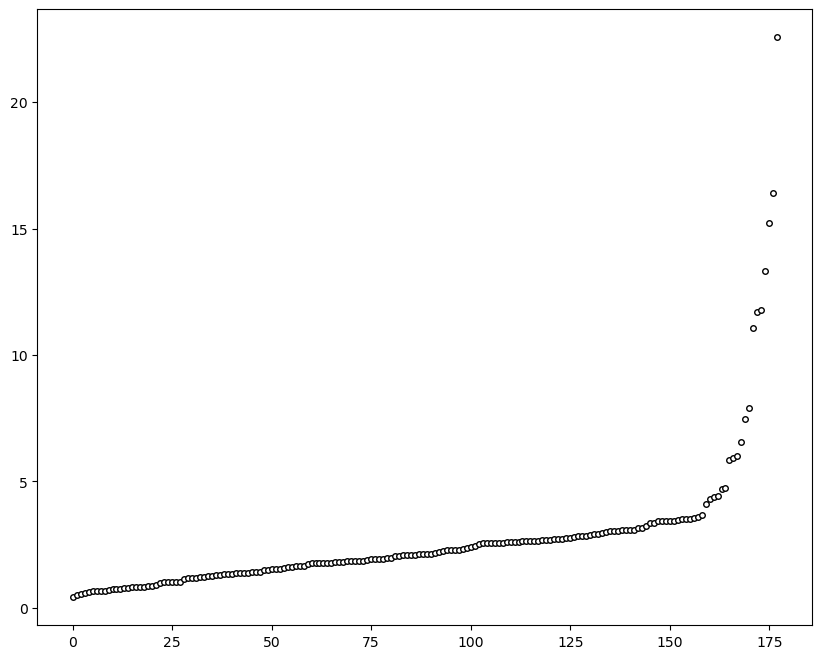

0.6874641833166084 [ 0.20030339  0.34913128 -0.11491471 -0.05357698 -0.57120508  0.12769089
  0.11230833  0.56356177  0.31190731  0.10315125 -0.0242308   0.1619543
  0.1198837 ]


In [23]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a5, L5 = pca.find_rob_pc(X5, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5, a5)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5, a5)
U5 = pca.project_line(X0, a5)
U5_0 = pca.project_line(X0, a5_0)

In [50]:
from sklearn.decomposition import PCA

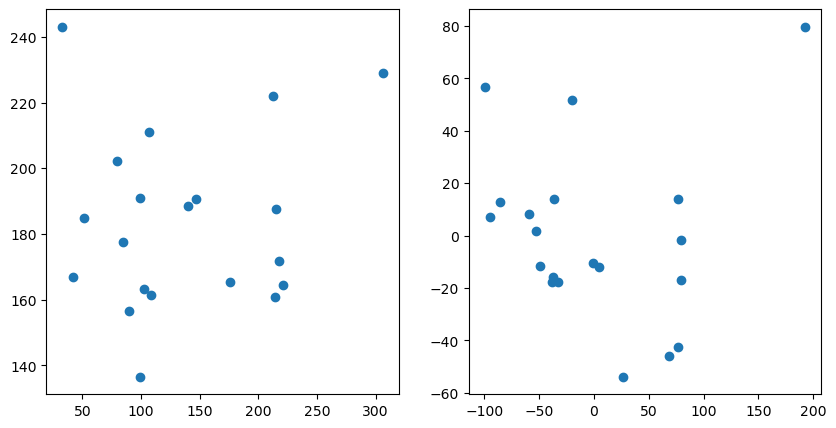

In [53]:
pca1 = PCA()
pca1.fit(XY0)
U = pca1.transform(XY0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2)
plt.subplot(1,2,2)
plt.scatter(U[:,0], U[:,1])
plt.show()

ValueError: x and y must be the same size

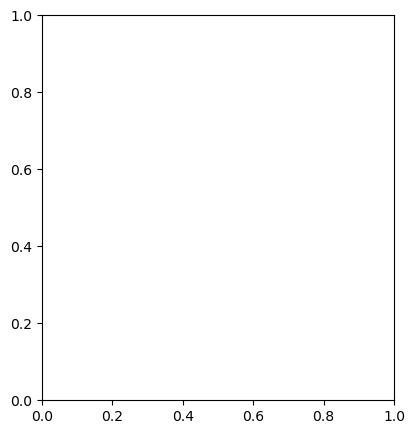

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U3)
plt.subplot(1,2,2)
plt.scatter(U[:,0], U[:,2])
plt.show()

In [70]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X0)

In [75]:
N = len(X0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
As, Ls, Us = pca.find_rob_pc_all(X0, wma)

0.6


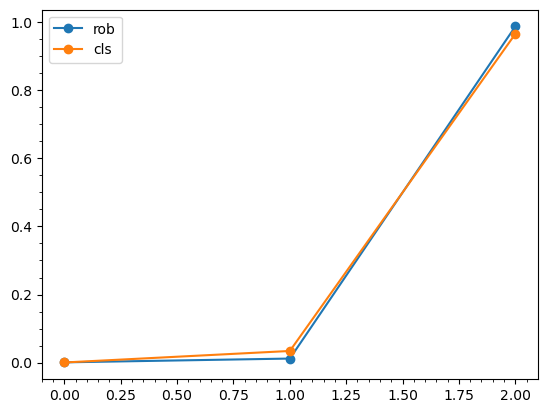

In [76]:
plt.plot(sorted(Ls/Ls.sum()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.sum()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [77]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

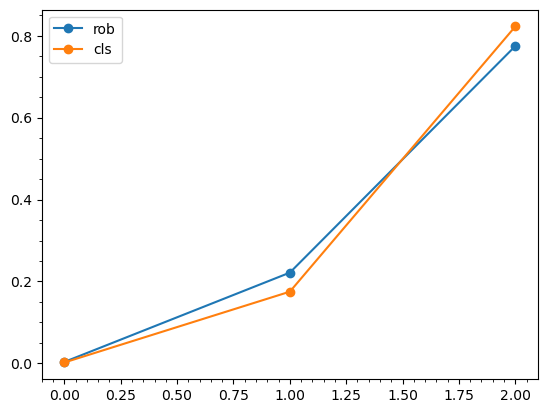

In [78]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [44]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [48]:
S = robust_scatter_matrix(X1, wma)
# print(S)

In [49]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.34480778 0.13347941 0.11208188 0.08932816 0.07881752 0.07484204
 0.00382249 0.00690471 0.01167033 0.01865011 0.05082278 0.03565056
 0.03912223]
